In [1]:
#Import
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Load dataset
url = "https://raw.githubusercontent.com/feliciagraciella/dataset/main/house_sales/kc_house_data.csv"
dataset = pd.read_csv(url)
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Kolom
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
dataset = dataset[["price", "lat", "long", "sqft_living", "bedrooms", "bathrooms", "waterfront", "view", "yr_built"]]
dataset.head()

,price,lat,long,sqft_living,bedrooms,bathrooms,waterfront,view,yr_built
0,221900.0,47.5112,-122.257,1180,3,1.00,0,0,1955
1,538000.0,47.7210,-122.319,2570,3,2.25,0,0,1951
2,180000.0,47.7379,-122.233,770,2,1.00,0,0,1933
3,604000.0,47.5208,-122.393,1960,4,3.00,0,0,1965
4,510000.0,47.6168,-122.045,1680,3,2.00,0,0,1987


In [5]:
#Cek null
dataset.isnull().sum()

price          0
lat            0
long           0
sqft_living    0
bedrooms       0
bathrooms      0
waterfront     0
view           0
yr_built       0
dtype: int64

In [6]:
#cek duplicate
print(dataset.duplicated().value_counts()) 

False    21600
True        13
dtype: int64


In [7]:
#menghapus duplicate

print("Jumlah data awal: ",dataset.shape)
dataset.drop_duplicates(keep='first', inplace=True)
print("Jumlah data akhir: ", dataset.shape)

Jumlah data awal:  (21613, 9)
Jumlah data akhir:  (21600, 9)


In [8]:
#EDA
dataset.describe()

,price,lat,long,sqft_living,bedrooms,bathrooms,waterfront,view,yr_built
count,2.160000e+04,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.00000,21600.000000
mean,5.401309e+05,47.560022,-122.213847,2080.225602,3.371157,2.114699,0.007546,0.23412,1970.990509
std,3.672211e+05,0.138593,0.140834,918.533885,0.930161,0.770230,0.086543,0.76587,29.368454
min,7.500000e+04,47.155900,-122.519000,290.000000,0.000000,0.000000,0.000000,0.00000,1900.000000
25%,3.215000e+05,47.470775,-122.328000,1430.000000,3.000000,1.750000,0.000000,0.00000,1951.000000
50%,4.500000e+05,47.571800,-122.230000,1910.000000,3.000000,2.250000,0.000000,0.00000,1975.000000
75%,6.450000e+05,47.678000,-122.125000,2550.000000,4.000000,2.500000,0.000000,0.00000,1997.000000
max,7.700000e+06,47.777600,-121.315000,13540.000000,33.000000,8.000000,1.000000,4.00000,2015.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21600 entries, 0 to 21612
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21600 non-null  float64
 1   lat          21600 non-null  float64
 2   long         21600 non-null  float64
 3   sqft_living  21600 non-null  int64  
 4   bedrooms     21600 non-null  int64  
 5   bathrooms    21600 non-null  float64
 6   waterfront   21600 non-null  int64  
 7   view         21600 non-null  int64  
 8   yr_built     21600 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.6 MB


In [10]:
# type data float ganti int
dataset['bathrooms'] = dataset['bathrooms'].astype('int')
# bedrooms 33 diganti 3 bds referensi
dataset['bedrooms'] = dataset['bedrooms'].replace(33,3)
dataset.head()

,price,lat,long,sqft_living,bedrooms,bathrooms,waterfront,view,yr_built
0,221900.0,47.5112,-122.257,1180,3,1,0,0,1955
1,538000.0,47.7210,-122.319,2570,3,2,0,0,1951
2,180000.0,47.7379,-122.233,770,2,1,0,0,1933
3,604000.0,47.5208,-122.393,1960,4,3,0,0,1965
4,510000.0,47.6168,-122.045,1680,3,2,0,0,1987


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


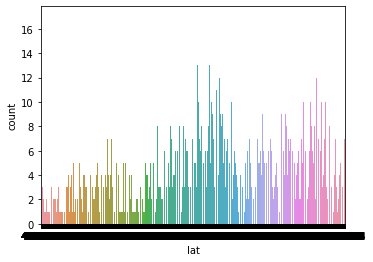

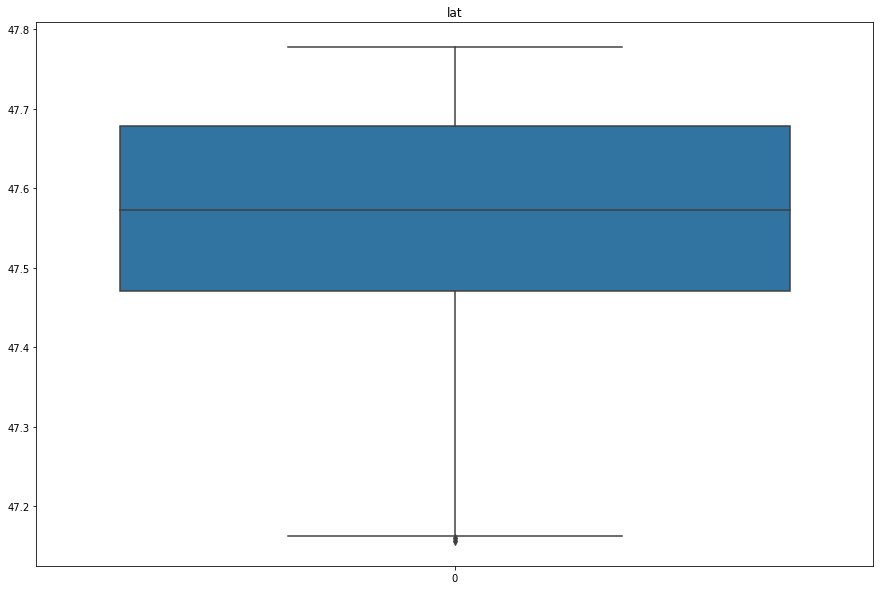

In [11]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(dataset['lat'])

plt.figure(figsize=(15, 10))
sns.boxplot(data=dataset['lat'])
plt.title("lat")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


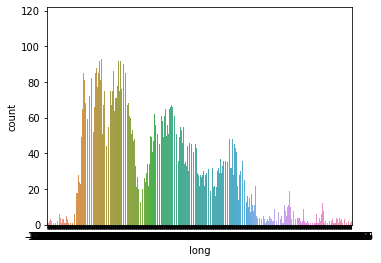

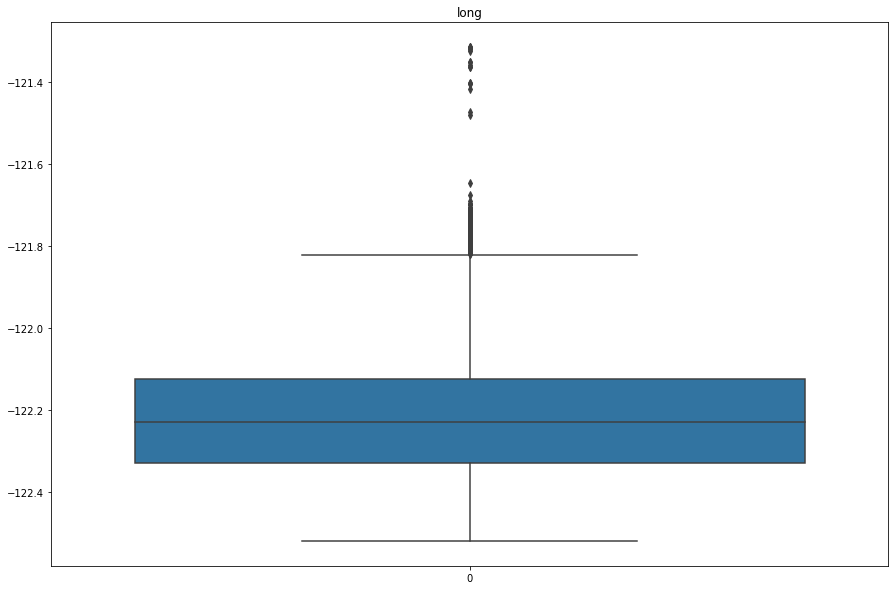

In [12]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(dataset['long'])

plt.figure(figsize=(15, 10))
sns.boxplot(data=dataset['long'])
plt.title("long")
plt.show()

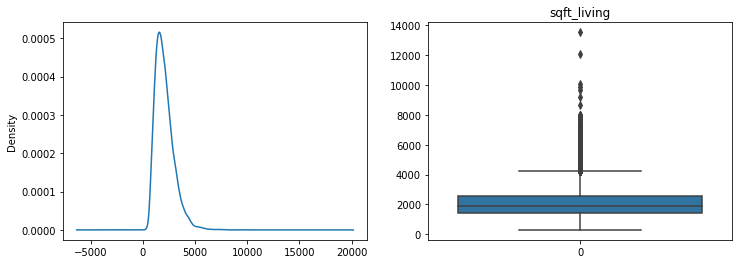

In [13]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
dataset['sqft_living'].plot(kind='kde')
f.add_subplot(1,2,2)
sns.boxplot(data=dataset['sqft_living'])
plt.title("sqft_living")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


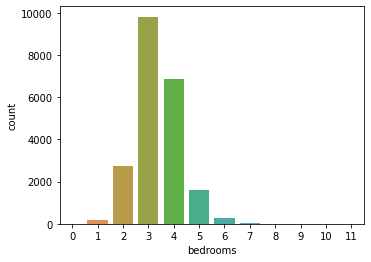

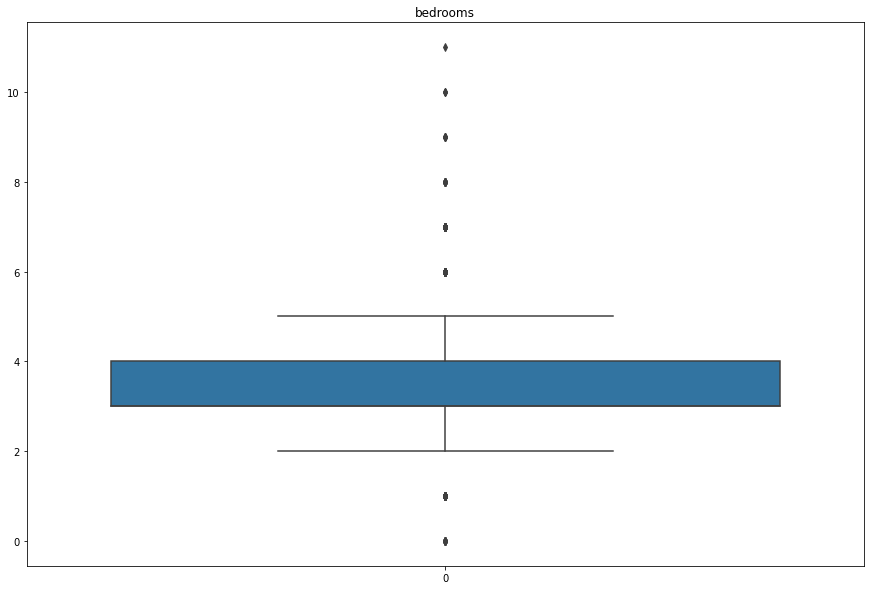

In [14]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(dataset['bedrooms'])

plt.figure(figsize=(15, 10))
sns.boxplot(data=dataset['bedrooms'])
plt.title("bedrooms")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


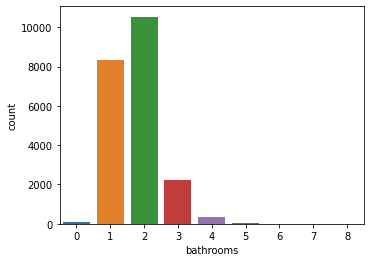

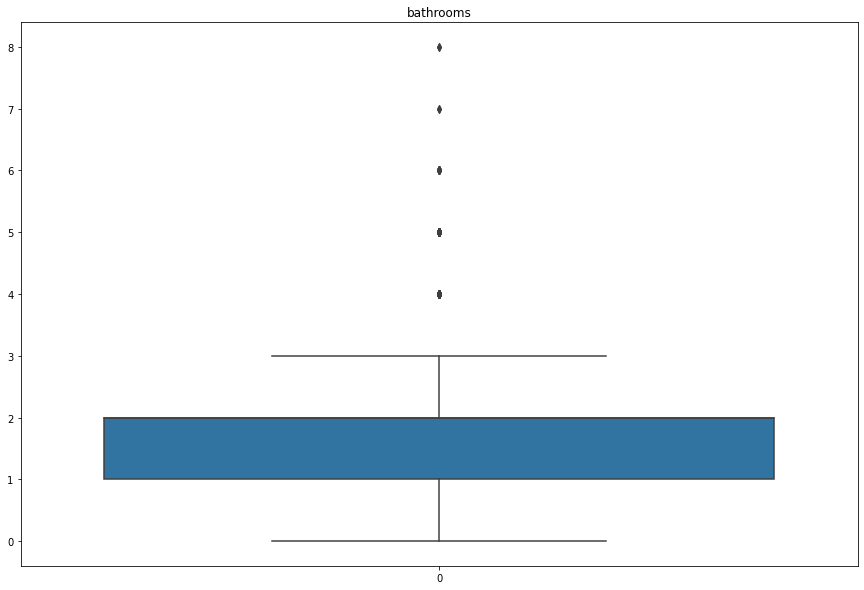

In [15]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(dataset['bathrooms'])

plt.figure(figsize=(15,10))
sns.boxplot(data=dataset['bathrooms'])
plt.title("bathrooms")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


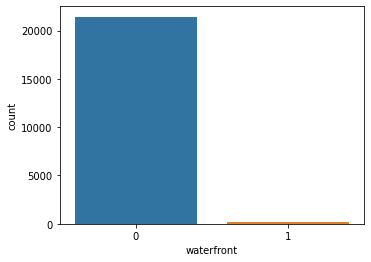

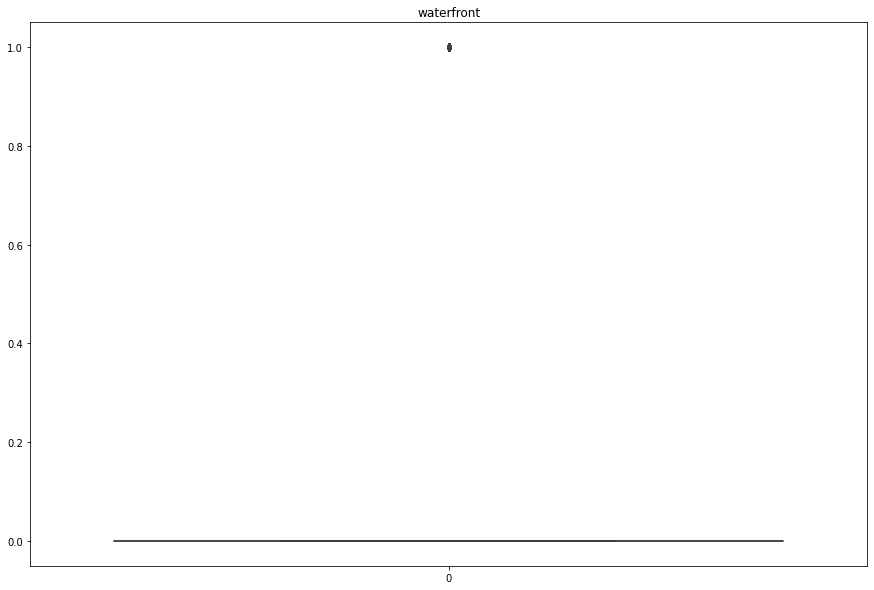

In [16]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(dataset['waterfront'])

plt.figure(figsize=(15,10))
sns.boxplot(data=dataset['waterfront'])
plt.title("waterfront")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


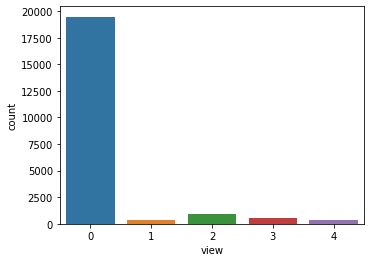

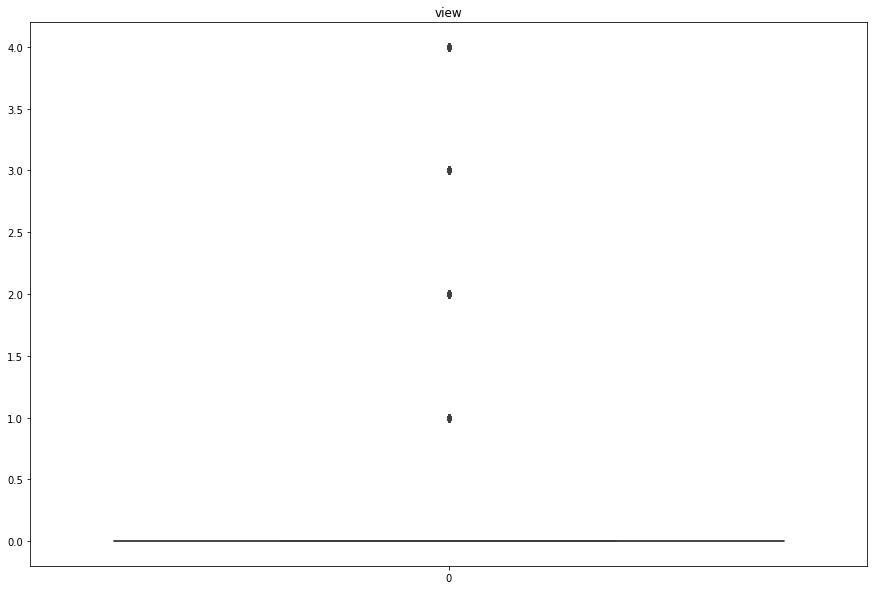

In [17]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(dataset['view'])

plt.figure(figsize=(15,10))
sns.boxplot(data=dataset['view'])
plt.title("view")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


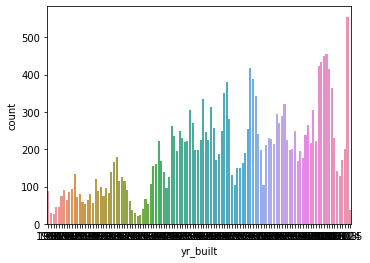

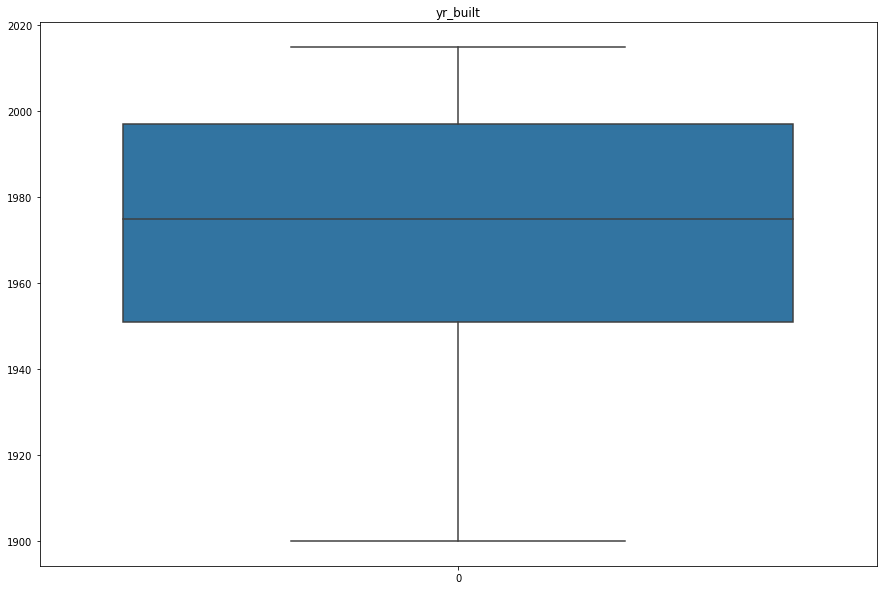

In [18]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(dataset['yr_built'])


plt.figure(figsize=(15,10))
sns.boxplot(data=dataset['yr_built'])
plt.title("yr_built")
plt.show()

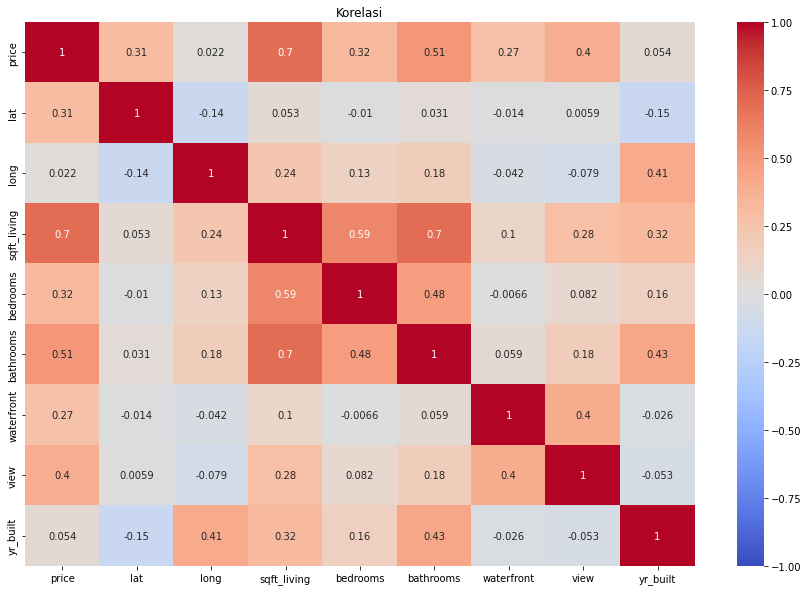

In [19]:
#korelasi

correlation = dataset.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title("Korelasi")
plt.show()

<Figure size 720x576 with 0 Axes>

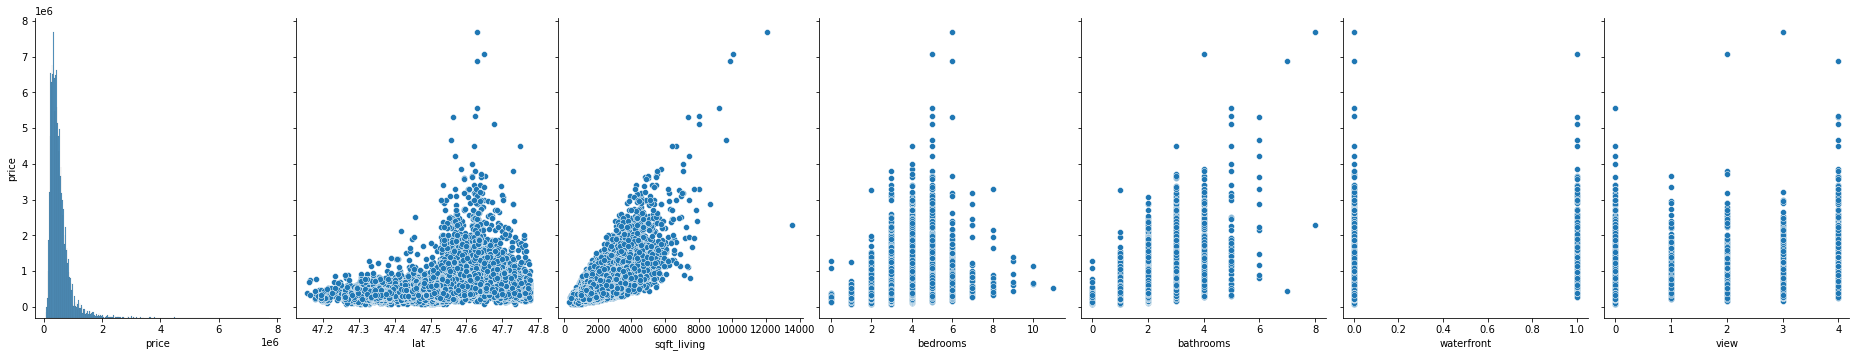

In [20]:
#lihat persebaran
# long dan yr_built tidak jadi dipakai karena korelasi rendah (tdk pengaruh kuat)
plt.figure(figsize=(10,8))
sns.pairplot(data=dataset, x_vars=["price", "lat", "sqft_living", "bedrooms", "bathrooms", "waterfront", "view"], y_vars=['price'], height=5, aspect=0.75)
plt.show()

In [21]:
#dependent independent
X = dataset[["lat", "sqft_living", "bedrooms", "bathrooms", "waterfront", "view"]]
y = dataset["price"]

In [22]:
#split train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
#model regresi
regression = LinearRegression().fit(X_train, y_train)

In [24]:
#summary
# X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                          2.242e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):                        0.00
Time:                        08:16:18   Log-Likelihood:                     -2.9850e+05
No. Observations:               21600   AIC:                                  5.970e+05
Df Residuals:                   21594   BIC:                                  5.971e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [25]:
pd.options.display.float_format = '{:0.4f}'.format
y_pred = regression.predict(X_test)
compare = pd.DataFrame({'Prediction' : y_pred, 'Actual' : y_test})

print(compare.sample(n=5))

       Prediction       Actual
5046  360186.9082  600000.0000
16146 577218.7250  437400.0000
14841 699011.9422  952000.0000
7216  856302.7280  605000.0000
20096 946163.3569 2250000.0000


In [26]:
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

LR_MAPE= MAPE(y_test, y_pred)
print("MAPE: ",LR_MAPE)
print('Model Score: ', regression.score(np.array(X_test), y_test))

MAPE:  26.61058455231618
Model Score:  0.6376137430269719


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [27]:
np.set_printoptions(precision=4)
print("Prediksi Harga Rumah: ", regression.predict([[47.155900,1500,4,2,1,1]]))

Prediksi Harga Rumah:  [702276.8674]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


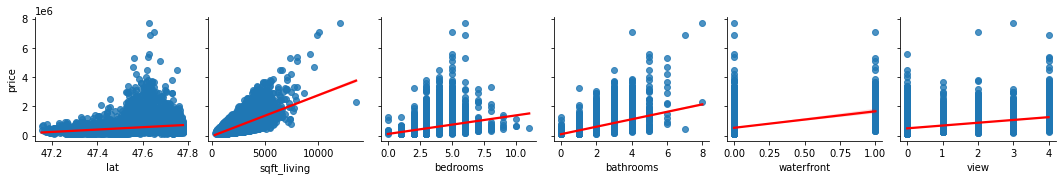

In [28]:
sns.pairplot(dataset, x_vars=["lat", "sqft_living", "bedrooms", "bathrooms", "waterfront", "view"], y_vars=["price"], kind='reg', plot_kws={'line_kws':{'color':'red'}})